In [29]:
import pandas as pd
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
from src.models.LogisticRegClassifier import LogisticRegClassifier
import numpy as np

In [30]:
clf = LogisticRegClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/without_outliers/train.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/without_outliers/test.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [31]:
combined_dict = {
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'liblinear'],
    'penalty': ['l2', None, 'elasticnet', 'l1'],
    'C': np.logspace(-4, 2, 50),
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 300, 400, 500],
    'multi_class': ['ovr', 'multinomial'],
    'l1_ratio': np.linspace(0, 1, 50)
}

clf.hyperparameter_tuning(X_train, y_train, combined_dict,'halving-random', 3, 'f1_macro')

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1

Inference time : 1.2762596209843952e-06 seconds
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11605
           1       0.95      0.88      0.91      3719
           2       0.98      1.00      0.99      3876

    accuracy                           0.96     19200
   macro avg       0.96      0.95      0.96     19200
weighted avg       0.96      0.96      0.96     19200

auc score for class 0:  0.9862065765278469
auc score for class 1:  0.9828640747753508
auc score for class 2:  0.9983899709851656


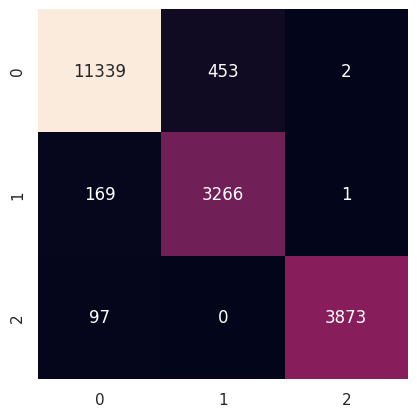

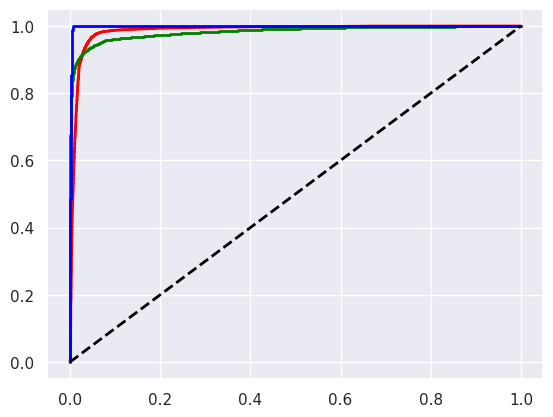

In [32]:
clf.evaluate(X_test, y_test)

In [33]:
path = '../models/LR/'
name = 'LogisticRegression_without_outliers'
clf.save(new_name=name, path=path)